## Show data patterns and cleaning

In [336]:
import pandas as pd

df = pd.read_csv("./dataset_raw.csv").drop(labels=["id"], axis=1)
print(f"Shape: {df.shape}")
df.head()

Shape: (27901, 17)


,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
2,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0
3,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1
4,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,5-6 hours,Moderate,M.Tech,Yes,1.0,1.0,No,0


In [337]:
df.info()
print(f"Duplicates: {sum(df.duplicated())}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 17 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Gender                                 27901 non-null  object 
 1   Age                                    27901 non-null  float64
 2   City                                   27901 non-null  object 
 3   Profession                             27901 non-null  object 
 4   Academic Pressure                      27901 non-null  float64
 5   Work Pressure                          27901 non-null  float64
 6   CGPA                                   27901 non-null  float64
 7   Study Satisfaction                     27901 non-null  float64
 8   Job Satisfaction                       27901 non-null  float64
 9   Sleep Duration                         27901 non-null  object 
 10  Dietary Habits                         27901 non-null  object 
 11  De

"Finincial stress" has some null values.

In [338]:
df_notna = df.dropna()
print(f"Dropped {df.shape[0] - df_notna.shape[0]} rows with nulls")

Dropped 3 rows with nulls


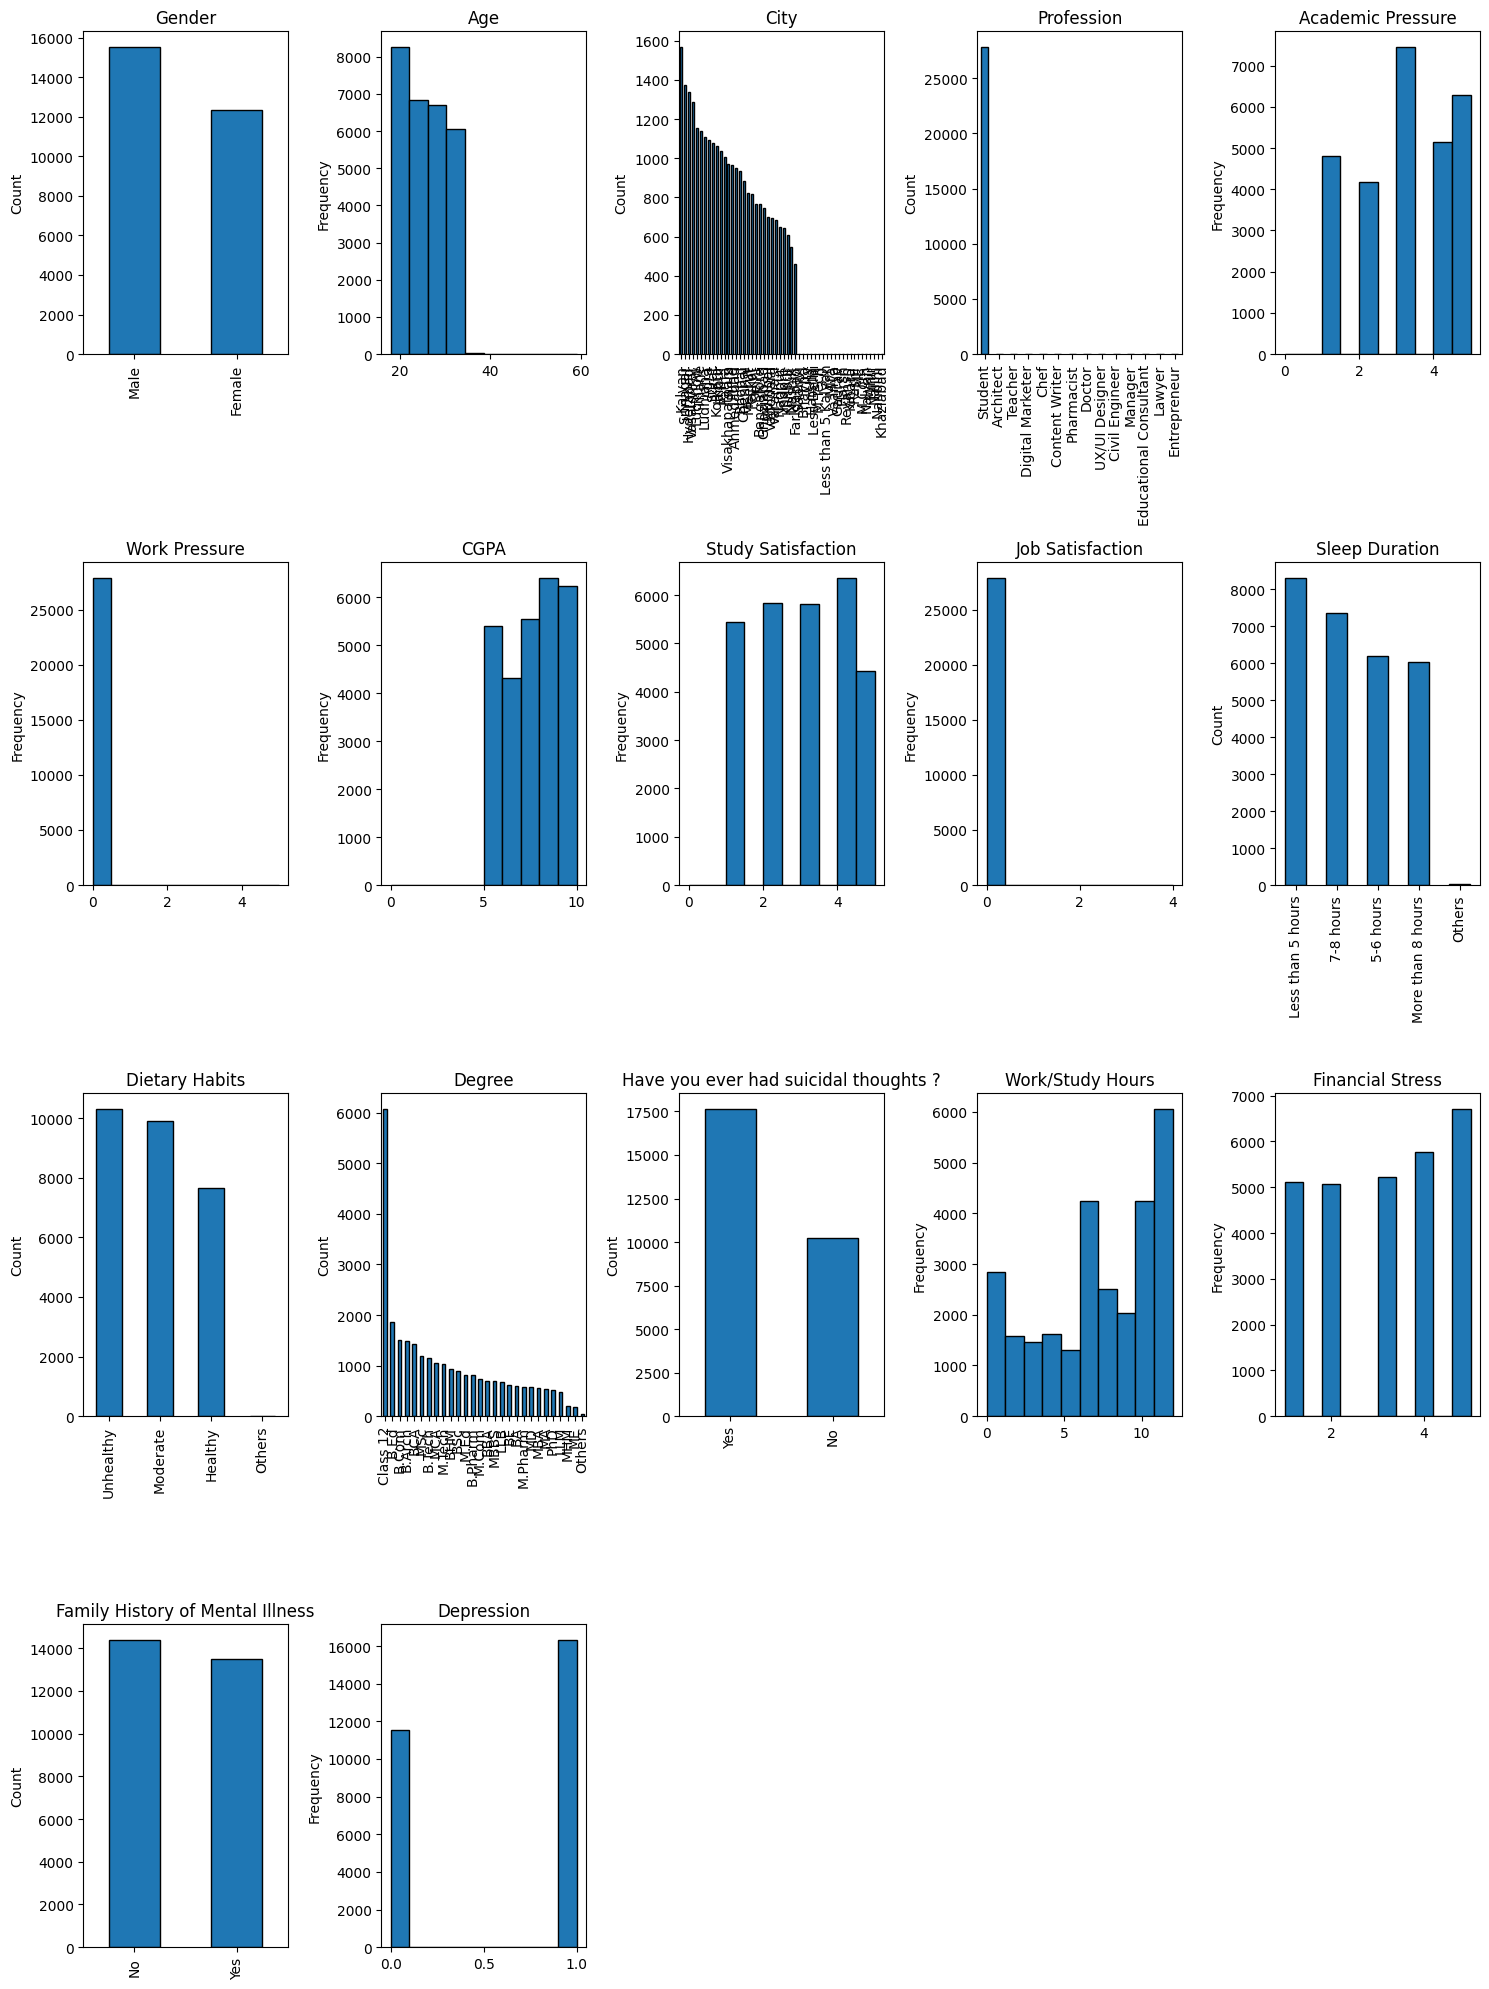

In [339]:
import matplotlib.pyplot as plt
import numpy as np

# Calculate the number of rows and columns for a "square-like" layout
n_cols = int(np.ceil(np.sqrt(len(df_notna.columns))))  # Number of columns
n_rows = int(np.ceil(len(df_notna.columns) / n_cols))  # Number of rows

# Create subplots
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(15, 5 * n_rows))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot histograms or bar plots
for i, attr in enumerate(df_notna.columns):
    if np.issubdtype(df_notna[attr].dtype, np.number):  # Check if the attribute is numerical
        df_notna[attr].plot(kind='hist', ax=axes[i], title=attr, bins=10, edgecolor='black')
        axes[i].set_ylabel('Frequency')
    else:  # For categorical data
        df_notna[attr].value_counts().plot(kind='bar', ax=axes[i], title=attr, edgecolor='black')
        axes[i].set_ylabel('Count')
        axes[i].set_xlabel('')

# Hide unused subplots
for j in range(len(df_notna.columns), len(axes)):
    axes[j].axis('off')

# Adjust layout and display
plt.tight_layout()
plt.show()

As it can also seen [in online discussions](https://www.reddit.com/r/indiasocial/comments/1ax6qqg/what_is_the_reason_behind_majority_of_the/), indian students usually don't work as we can observe from "Work Pressure", "Profession" and "Job Satisfaction". 

Because of this we also have to remove the "working students" as they can change significantly the attribute "Work/Study Hours" and so then we'll can rename it in "Study Hours".

In [340]:
working_students = df_notna[df_notna["Profession"]!="Student"].index.to_list()
print(f"There are {len(working_students)} working students")

There are 31 working students


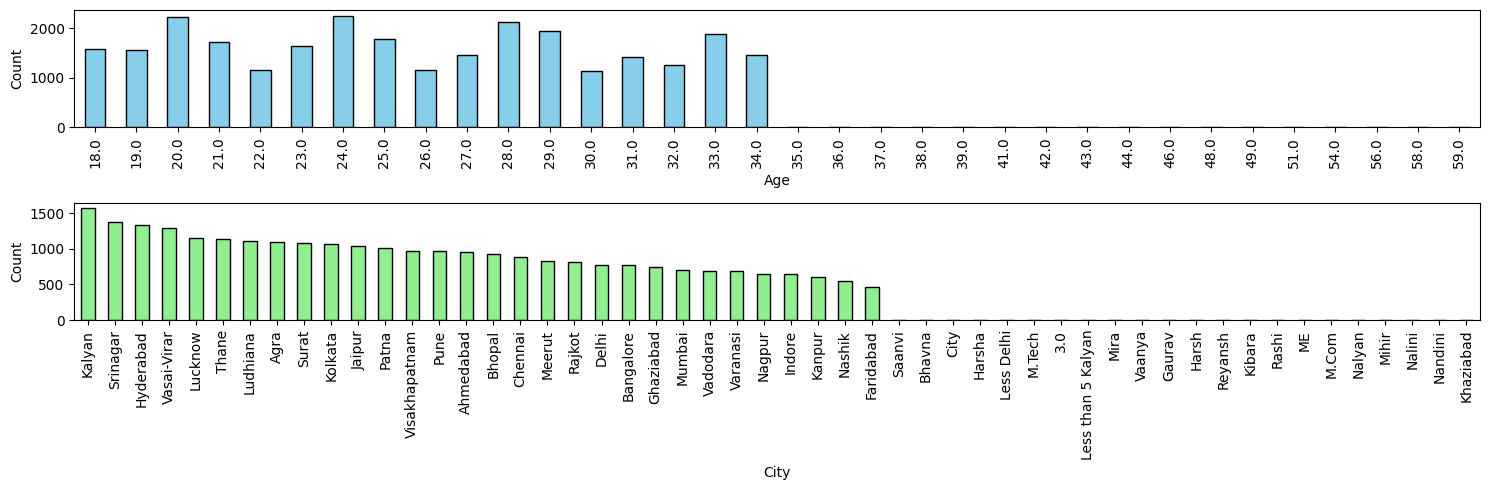

In [341]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(15, 5))

df_notna['Age'].value_counts().sort_index().plot(kind='bar', ax=axes[0], edgecolor='black', color='skyblue')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Count')

df_notna['City'].value_counts().plot(kind='bar', ax=axes[1], edgecolor='black', color='lightgreen')
axes[1].set_xlabel('City')
axes[1].set_ylabel('Count')

plt.tight_layout()
plt.show()

In [342]:
threshold = 1 # % threshold over all the samples
city_counts = df_notna['City'].value_counts()
unpopular_cities = city_counts[city_counts < threshold/100*df_notna.shape[0]].index
students_in_unpopular_cities = df_notna[df_notna['City'].isin(unpopular_cities)].shape[0]
print(f"There are {students_in_unpopular_cities} students ({100*students_in_unpopular_cities/df_notna.shape[0]:.4f}%) in unpopular cities (which are {len(unpopular_cities)})")

over_34_students = df_notna[df_notna['Age'] > 34].shape[0]
print(f"There are {over_34_students} students over 34 y/o (which are {100*over_34_students/df_notna.shape[0]:.4f}%)")

There are 26 students (0.0932%) in unpopular cities (which are 22)
There are 49 students over 34 y/o (which are 0.1756%)


Since we are working on Bayesian Networks and outliers are not that much a problem, so we'll keep the data of Age and City as they are by now.

In [343]:
df_cleaned = df_notna.drop(columns=["Profession", "Work Pressure", "Job Satisfaction"])
df_cleaned.drop(index=working_students, inplace=True)
df_cleaned.rename(columns={"Work/Study Hours" : "Study Hours"}, inplace=True)

print(f"Shape: {df_cleaned.shape}")
df_cleaned.head()

Shape: (27867, 14)


,Gender,Age,City,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,Male,33.0,Visakhapatnam,5.0,8.97,2.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,Female,24.0,Bangalore,2.0,5.90,5.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
2,Male,31.0,Srinagar,3.0,7.03,5.0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0
3,Female,28.0,Varanasi,3.0,5.59,2.0,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1
4,Female,25.0,Jaipur,4.0,8.13,3.0,5-6 hours,Moderate,M.Tech,Yes,1.0,1.0,No,0


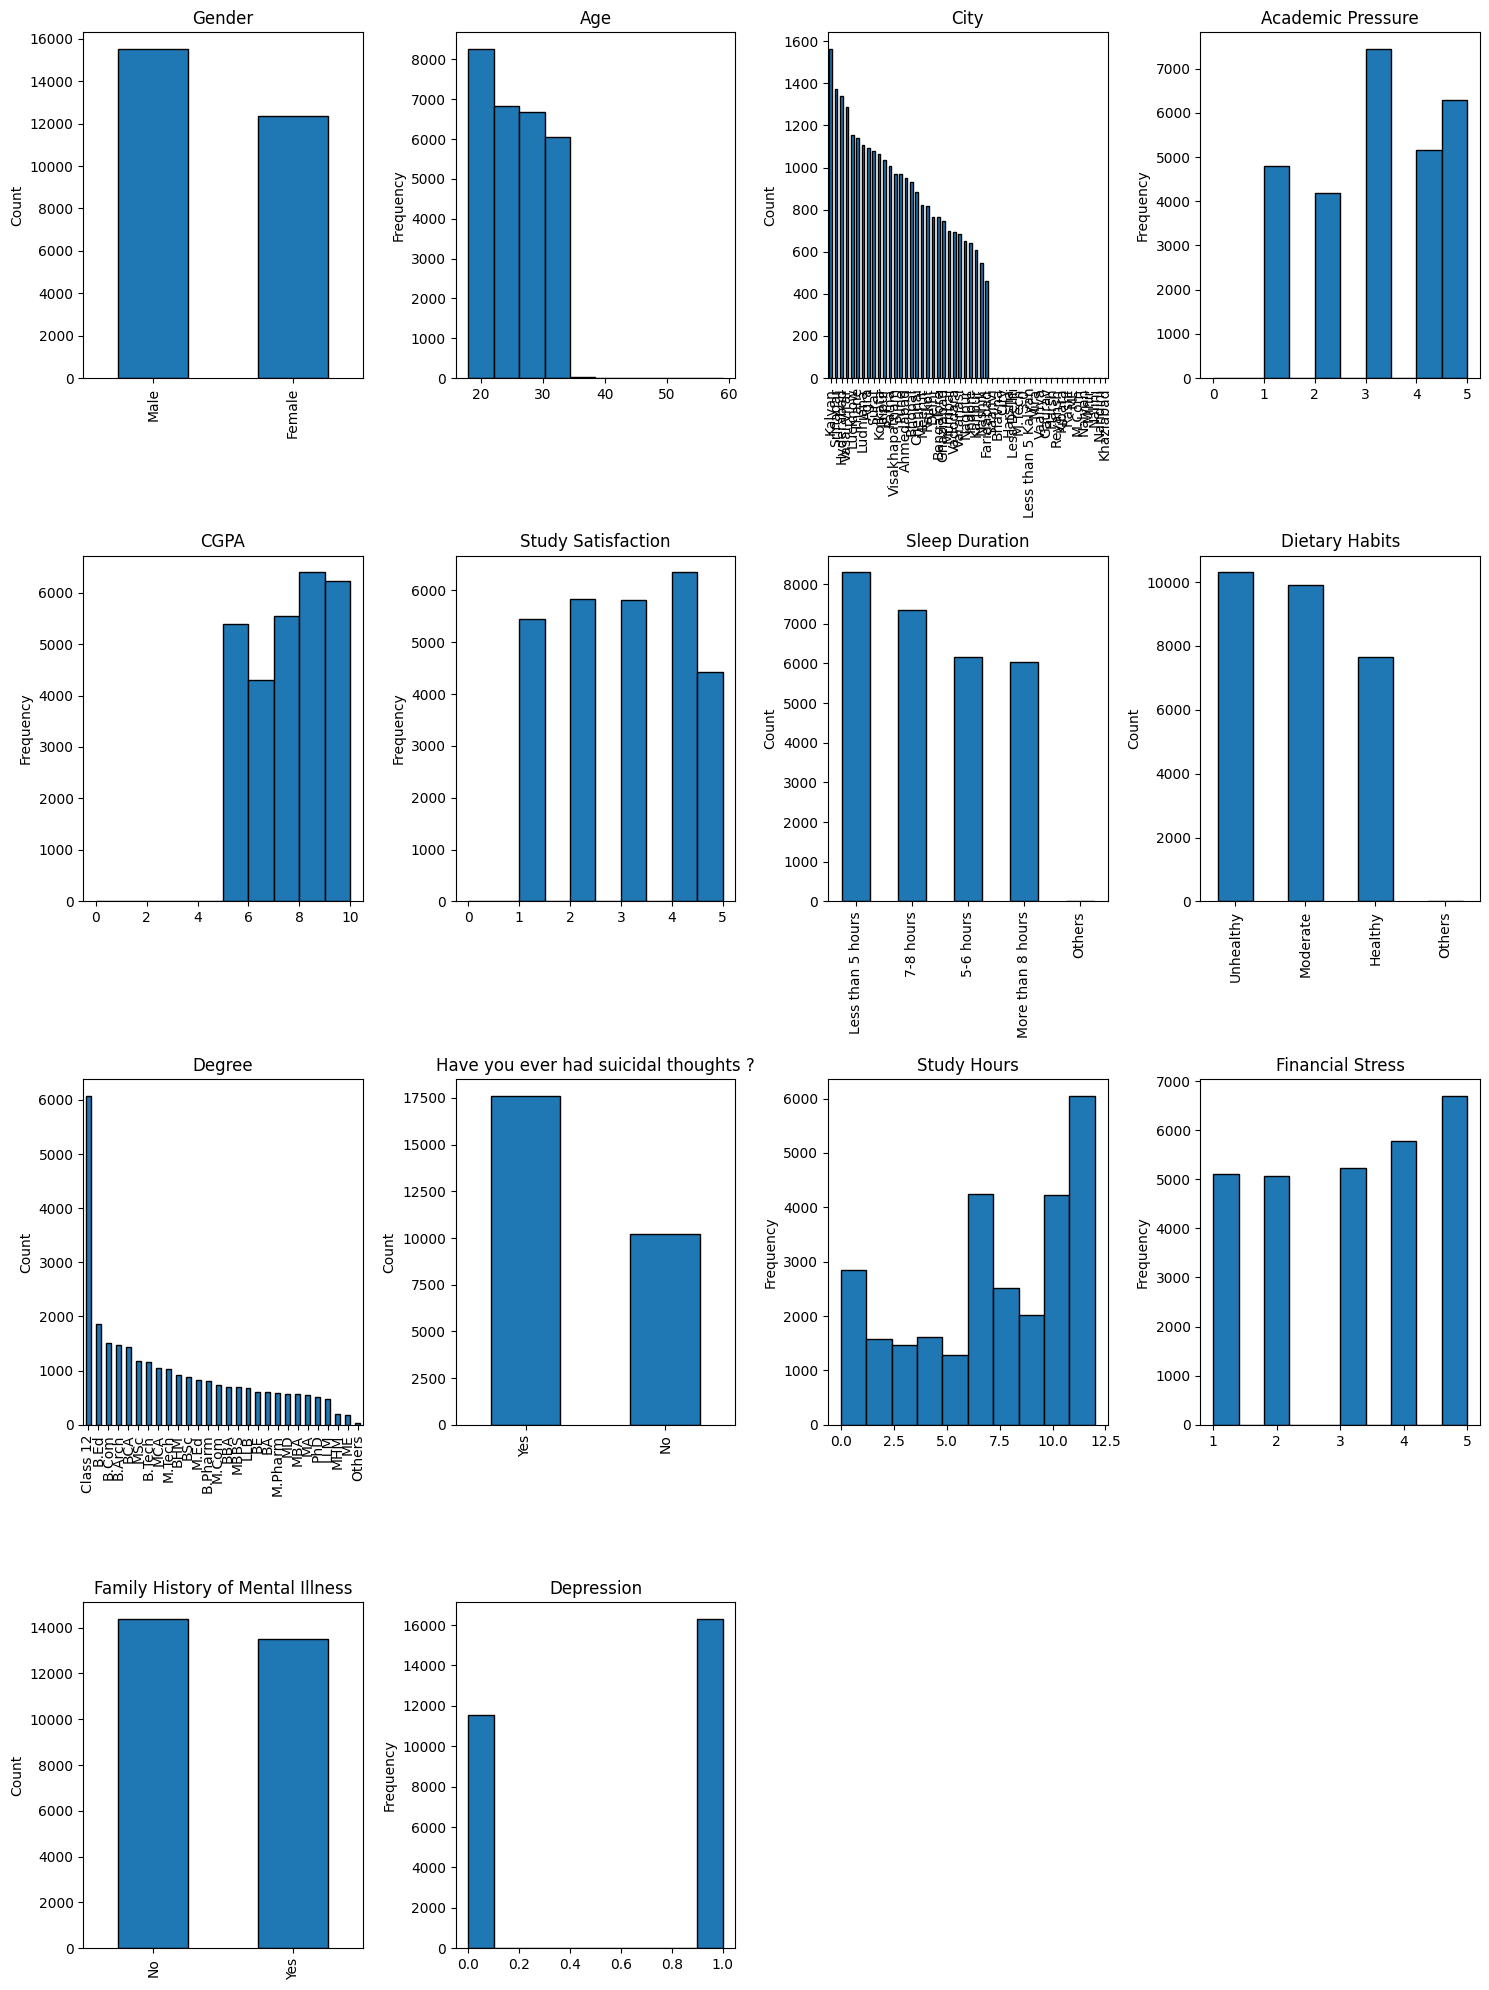

In [344]:
# Calculate the number of rows and columns for a "square-like" layout
n_cols = int(np.ceil(np.sqrt(len(df_cleaned.columns))))  # Number of columns
n_rows = int(np.ceil(len(df_cleaned.columns) / n_cols))  # Number of rows

# Create subplots
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(15, 5 * n_rows))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot histograms or bar plots
for i, attr in enumerate(df_cleaned.columns):
    if np.issubdtype(df_cleaned[attr].dtype, np.number):  # Check if the attribute is numerical
        df_cleaned[attr].plot(kind='hist', ax=axes[i], title=attr, edgecolor='black')
        axes[i].set_ylabel('Frequency')
    else:  # For categorical data
        df_cleaned[attr].value_counts().plot(kind='bar', ax=axes[i], title=attr, edgecolor='black')
        axes[i].set_ylabel('Count')
        axes[i].set_xlabel('')

# Hide unused subplots
for j in range(len(df_cleaned.columns), len(axes)):
    axes[j].axis('off')

# Adjust layout and display
plt.tight_layout()
plt.show()

## Data preparantion 

Since we have to work with discrete numerical values in Bayesian Networks we have to make some bins and encode them.

1. [Gender](#gender)
2. [Age](#age)
3. [City](#city)
4. [Sleep Duration](#sleep-duration)
5. [Dietary Habits](#dietary-habits)
6. [Degree](#degree)
7. [Suicidial Thougths](#suicidial-thougths)
8. [Study Hours](#study-hours)
9. [Mental Ilness](#mental-illness)
10. [Depression](#depression)

In [345]:
df_final = pd.DataFrame()
label_mappings = {}

### Gender

In [346]:
from sklearn.preprocessing import LabelEncoder

label = "Gender"

encoder = LabelEncoder()
df_final[label] = encoder.fit_transform(df_cleaned[label])

label_mappings[label] = dict(zip(encoder.classes_, encoder.transform(encoder.classes_)))
label_mappings[label]

{'Female': 0, 'Male': 1}

### Age

In [362]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.patches import Patch

def plot_binned_histogram(df, column, bin_column, bins=10, colors=None):
    """
    Plots a histogram of a given column, coloring bars based on assigned bin labels.
    
    Parameters:
    - df: DataFrame containing the data
    - column: Name of the original numerical column
    - bin_column: Name of the column containing bin labels
    - bins: Number of bins for the histogram
    - colors: List or dict mapping bin labels to colors
    """
    if colors is None:
        unique_bins = df[bin_column].unique()
        colors = {bin_label: plt.cm.viridis(i / len(unique_bins)) for i, bin_label in enumerate(unique_bins)}
    
    # Create figure and axis
    fig, ax = plt.subplots(figsize=(7, 6))
    
    # Compute histogram bin edges
    bin_edges = np.histogram_bin_edges(df[column], bins=bins)
    
    # Plot histogram and store patches (bars)
    n, _, patches = ax.hist(df[column], bins=bin_edges, edgecolor='black')
    
    # Assign colors to bars based on binning
    for patch, left_edge in zip(patches, bin_edges[:-1]):
        bin_index = df[df[column] >= left_edge][bin_column].min()
        patch.set_facecolor(colors.get(bin_index, 'gray'))
    
    # Customize plot
    ax.set_title(f'Histogram of {column} with Binned Categories')
    ax.set_xlabel(column)
    ax.set_ylabel('Frequency')
    
    # Create legend
    legend_patches = [Patch(color=colors[i], label=f'Bin {i}') for i in sorted(colors.keys())]
    ax.legend(handles=legend_patches, title=f'{column} Bins')
    
    plt.show()

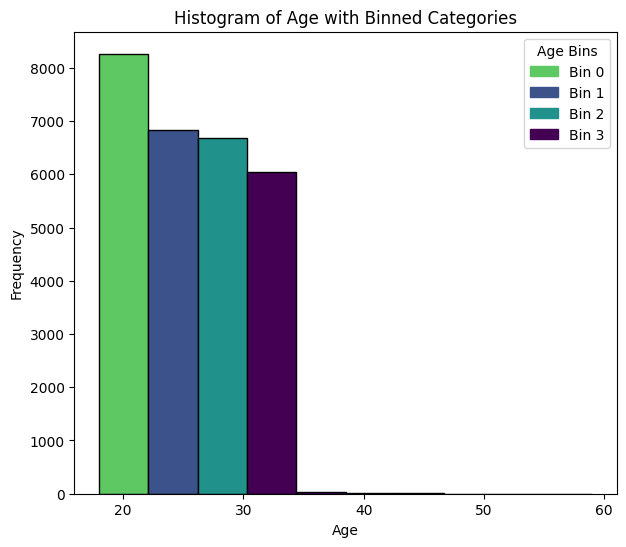

{Interval(17.999, 21.0, closed='right'): 0,
 Interval(21.0, 25.0, closed='right'): 1,
 Interval(25.0, 30.0, closed='right'): 2,
 Interval(30.0, 59.0, closed='right'): 3}

In [376]:
# Create percentile bins
label = 'Age_Bin_Percentile'
df_cleaned[label] = pd.qcut(df_cleaned['Age'], q=4)

# Map bins to integer labels
label_mappings["Age"] = {bin: i for i, bin in enumerate(df_cleaned[label].cat.categories)}
df_cleaned[label] = df_cleaned[label].map(label_mappings["Age"])

# Copy the processed column to a new DataFrame
df_final["Age"] = df_cleaned[label].copy()

# Plot new bins
plot_binned_histogram(df_cleaned, 'Age', 'Age_Bin_Percentile', bins=10)
label_mappings["Age"]

### City

In [366]:
...

Ellipsis

### CGPA (??)

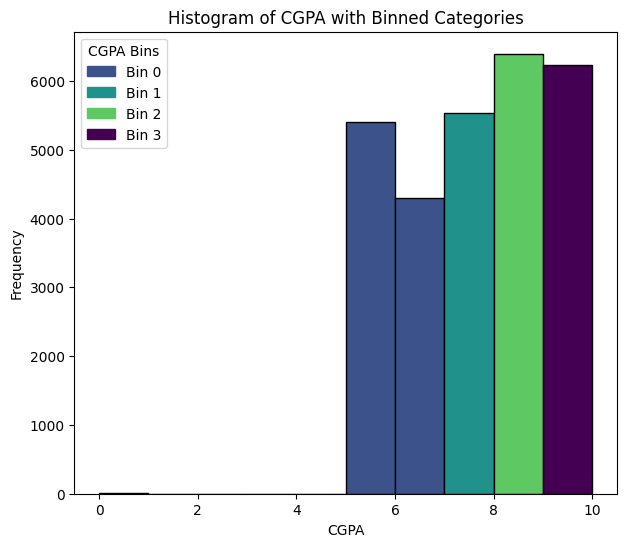

{Interval(-0.001, 6.29, closed='right'): 0,
 Interval(6.29, 7.77, closed='right'): 1,
 Interval(7.77, 8.92, closed='right'): 2,
 Interval(8.92, 10.0, closed='right'): 3}

In [375]:
# Create percentile bins
label = 'CGPA_Bin_Percentile'
df_cleaned[label] = pd.qcut(df_cleaned['CGPA'], q=4)

# Map bins to integer labels
label_mappings["CGPA"] = {bin: i for i, bin in enumerate(df_cleaned[label].cat.categories)}
df_cleaned[label] = df_cleaned[label].map(label_mappings["CGPA"])

# Copy the processed column to a new DataFrame
df_final["CGPA"] = df_cleaned[label].copy()

# Plot new bins
plot_binned_histogram(df_cleaned, 'CGPA', label, bins=10)

label_mappings["CGPA"]

### Sleep Duration

In [264]:
label = "Sleep Duration"

label_mappings[label] = {
    'Less than 5 hours': 0,
    '5-6 hours': 1,
    '7-8 hours': 2,
    'More than 8 hours': 3,
    'Others': -1
}

df_final[label] = df_cleaned[label].map(label_mappings[label]).reset_index(drop=True)
label_mappings[label]

{'Less than 5 hours': 0,
 '5-6 hours': 1,
 '7-8 hours': 2,
 'More than 8 hours': 3,
 'Others': -1}

### Dietary Habits

In [265]:
label = "Dietary Habits"

label_mappings[label] = {
    'Unhealthy' : 0, 
    'Moderate' : 1, 
    'Healthy' : 2, 
    'Others' : -1
}

df_final[label] = df_cleaned[label].map(label_mappings[label]).reset_index(drop=True)
label_mappings[label]

{'Unhealthy': 0, 'Moderate': 1, 'Healthy': 2, 'Others': -1}

### Degree

In [ ]:
...

Ellipsis

### Suicidial Thougths

In [260]:
label = "Have you ever had suicidal thoughts ?"

encoder = LabelEncoder()
df_final[label] = encoder.fit_transform(df_cleaned[label])

label_mappings[label] = dict(zip(encoder.classes_, encoder.transform(encoder.classes_)))
label_mappings[label]

{'No': 0, 'Yes': 1}

### Study Hours

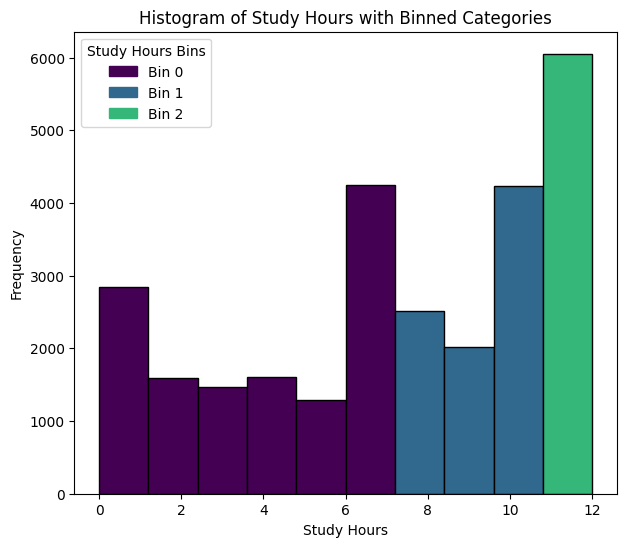

{Interval(-0.001, 6.0, closed='right'): 0,
 Interval(6.0, 10.0, closed='right'): 1,
 Interval(10.0, 12.0, closed='right'): 2}

In [377]:
# Create percentile bins
label = 'Study_Hours_Bin_Percentile'
df_cleaned[label] = pd.qcut(df_cleaned['Study Hours'], q=3)

# Map bins to integer labels
label_mappings["Study Hours"] = {bin: i for i, bin in enumerate(df_cleaned[label].cat.categories)}
df_cleaned[label] = df_cleaned[label].map(label_mappings["Study Hours"])

# Copy the processed column to a new DataFrame
df_final["Study Hours"] = df_cleaned[label].copy()

# Plot new bins
plot_binned_histogram(df_cleaned, 'Study Hours', label, bins=10)
label_mappings["Study Hours"]

### Mental Illness

In [259]:
label = "Family History of Mental Illness"

encoder = LabelEncoder()
df_final[label] = encoder.fit_transform(df_cleaned[label])

label_mappings[label] = dict(zip(encoder.classes_, encoder.transform(encoder.classes_)))
label_mappings[label]

{'No': 0, 'Yes': 1}

### Depression

In [ ]:
...

Ellipsis

In [266]:
df_final

,Gender,Sleep Duration,Family History of Mental Illness,Have you ever had suicidal thoughts ?,Dietary Habits
0,1,1,0,1,2
1,0,1,1,0,1
2,1,0,1,0,2
3,0,2,1,1,1
4,0,1,0,1,1
...,...,...,...,...,...
27862,0,1,1,1,0
27863,1,0,1,0,2
27864,1,1,0,0,0
27865,0,0,0,1,2
